# ANÁLISE DO EFEITO DA VACINAÇÃO NO BRASIL E NO ESTADO DE SP 



## Fonte de Dados:
### site: https://opendatasus.saude.gov.br/dataset/bd-srag-2021
##
## Processo:

<ol>
    <li> Importar dataframe evidenciando idosos, óbitos e casos diagnosticados como COVID 19 </li>
    <li> Traçar gráficos:</li>
No Brasil: 
    <ul> 
        <li>notificações x semana (separados por covid), </li> 
        <li> covid x semana (separados por idosos),</li>
        <li> óbitos de covid x semana (separados por idosos)</li>
        <li> I dososx semana (separados por óbitos)</li> 
    </ul>
        
Em São Paulo:
    <ul>
        <li> notificações x semana (separados por covid), </li>
        <li> covid x semana (separados por idosos),</li>
        <li> óbitos de covid x semana (separados por idosos)</li>
        <li> Idosos x semana (separados por óbitos)</li>
    </ul>
<li> Análise de proporção </li>
<li> Análises antigas mantidas durante o processo (desconsiderar)</li>
</ol>

## Importar Dataframes e Bibliotecas

In [1]:
#Importar bibliotecas
import pandas as pn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
#Definido como idoso pessoas acima de 'idade' para fins desse estudo
idade = 78 #dia 9 de março começou a vacinação de pessoas com 77 anos
estado = 'SP'
#Mapa da vacinação
#https://especiais.g1.globo.com/bemestar/vacina/2021/mapa-brasil-vacina-covid/

In [3]:
#importa dataframe
df = pn.read_csv('INFLUD21-29-03-2021b.csv', sep=';', usecols=[0, 1, 4, 5,11, 12, 13,53, 107,110]) #53,76,
df['IDOSO'] =  df['NU_IDADE_N'] >= idade
df['OBITO'] = df['EVOLUCAO'] == 2
df['COVID19'] = df['CLASSI_FIN'] == 5

In [4]:
#mostra cabeça do dataframe
df.tail(5)

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
421363,21/03/2021,12,RJ,NaN,F,03/02/1979,42,NaN,NaN,NaN,False,False,False
421364,13/03/2021,10,RJ,NaN,M,25/04/1980,40,NaN,5.0,9.0,False,False,True
421365,28/03/2021,13,SE,REGIONAL ESTANCIA,M,22/01/1948,73,NaN,NaN,NaN,False,False,False
421366,13/02/2021,6,PE,001,M,06/09/1936,84,2.0,NaN,NaN,True,False,False
421367,28/03/2021,13,SP,GVE XXIX SAO JOSE DO RIO PRETO,F,12/08/1964,56,NaN,NaN,NaN,False,False,False


In [5]:
#Média das idades dos pacientes
df['NU_IDADE_N'].mean()

56.654145544986804

In [6]:
#Numero de registros (casos notificados)
df.count()
#df.nunique()

DT_NOTIFIC    421368
SEM_NOT       421368
SG_UF_NOT     421368
ID_REGIONA    384108
CS_SEXO       421368
DT_NASC       420997
NU_IDADE_N    421368
OBESIDADE     159129
CLASSI_FIN    331727
EVOLUCAO      254950
IDOSO         421368
OBITO         421368
COVID19       421368
dtype: int64

In [7]:
#Verificar os tipos dos dados importados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421368 entries, 0 to 421367
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_NOTIFIC  421368 non-null  object 
 1   SEM_NOT     421368 non-null  int64  
 2   SG_UF_NOT   421368 non-null  object 
 3   ID_REGIONA  384108 non-null  object 
 4   CS_SEXO     421368 non-null  object 
 5   DT_NASC     420997 non-null  object 
 6   NU_IDADE_N  421368 non-null  int64  
 7   OBESIDADE   159129 non-null  float64
 8   CLASSI_FIN  331727 non-null  float64
 9   EVOLUCAO    254950 non-null  float64
 10  IDOSO       421368 non-null  bool   
 11  OBITO       421368 non-null  bool   
 12  COVID19     421368 non-null  bool   
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 33.4+ MB


## Evidenciar COVID, OBITO E IDOSOS no data frame Brasil

In [8]:
df_covidbr = df[df['COVID19']==True]
df_ob_covidbr = df_covidbr[df_covidbr['OBITO']==True]
df_idosos_covidbr = df_covidbr[df_covidbr['IDOSO']==True]

# GRÁFICOS BRASIL

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

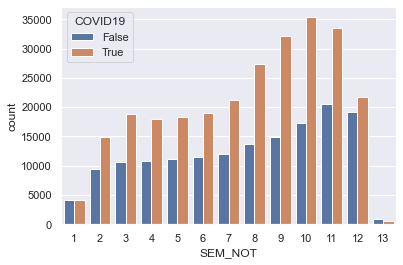

In [9]:
###        notificações x semana (separados por idosos), 
sns.countplot(data=df, x = 'SEM_NOT', hue = 'COVID19')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

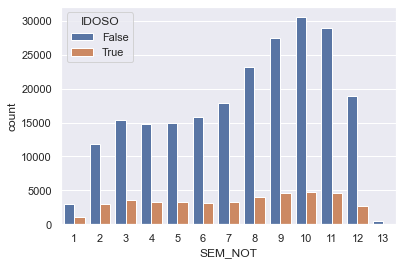

In [10]:
###        covid x semana (separados por idosos),
sns.countplot(data=df_covidbr, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

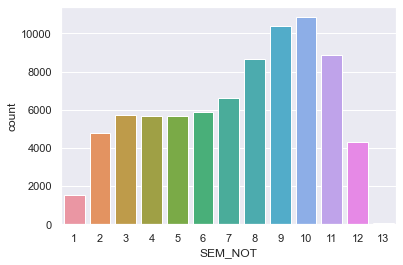

In [11]:
###        óbitos de covid x semana (separados por idosos)
sns.countplot(data=df_ob_covidbr, x = 'SEM_NOT')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

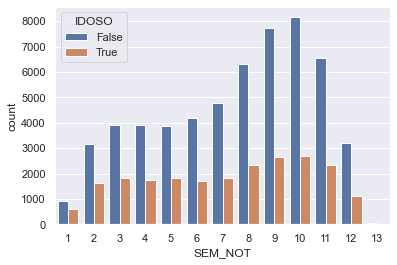

In [12]:
###        óbitos de covid x semana (separados por idosos)
sns.countplot(data=df_ob_covidbr, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

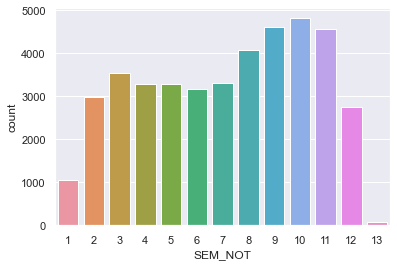

In [13]:
###        Idosos Notificados x semana 
sns.countplot(data=df_idosos_covidbr, x = 'SEM_NOT')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

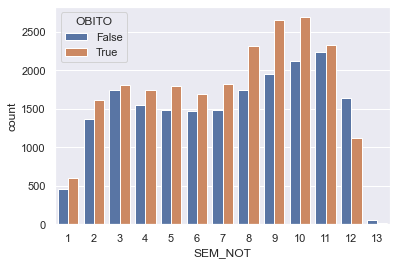

In [14]:
###        Idososx semana (separados por óbitos)
sns.countplot(data=df_idosos_covidbr, x = 'SEM_NOT', hue = 'OBITO')

## Separar Dataframe Estadual (por exemplo: São Paulo)

In [15]:
### ESTADO DE SÃO PAULO
df_sp = df[df['SG_UF_NOT']==estado]
df_covidsp = df_covidbr[df_covidbr['SG_UF_NOT']==estado]
df_ob_covidsp = df_covidbr[df_covidbr['SG_UF_NOT']==estado]
df_idosos_covidsp = df_idosos_covidbr[df_idosos_covidbr['SG_UF_NOT']==estado]

In [16]:
df_sp.count()

DT_NOTIFIC    126689
SEM_NOT       126689
SG_UF_NOT     126689
ID_REGIONA    126689
CS_SEXO       126689
DT_NASC       126517
NU_IDADE_N    126689
OBESIDADE      47534
CLASSI_FIN    101551
EVOLUCAO       76134
IDOSO         126689
OBITO         126689
COVID19       126689
dtype: int64

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

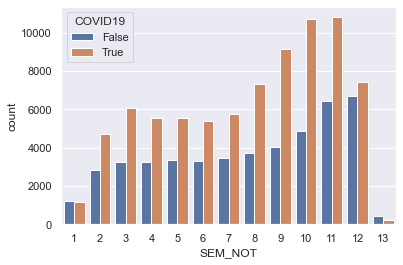

In [17]:
###        notificações x semana (separados por idosos), 
sns.countplot(data=df_sp, x = 'SEM_NOT', hue = 'COVID19')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

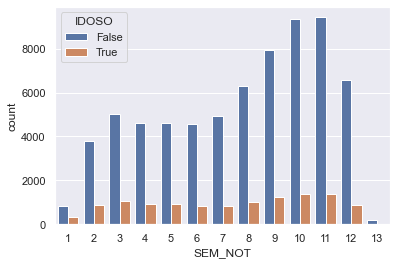

In [18]:
###        covid x semana (separados por idosos),
sns.countplot(data=df_covidsp, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

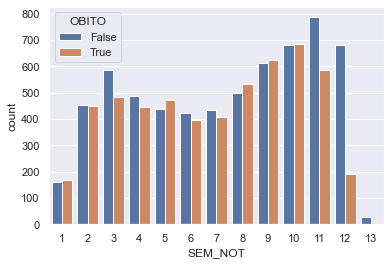

In [19]:
###        Idosos x semana (separados por óbitos)
sns.countplot(data=df_idosos_covidsp, x = 'SEM_NOT', hue = 'OBITO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

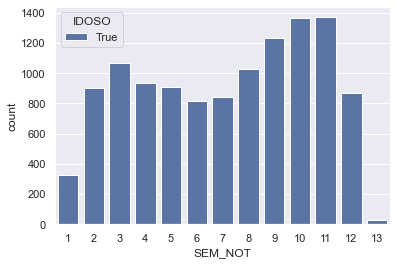

In [20]:
###        Óbitos x semana (separados por idosos)
sns.countplot(data=df_idosos_covidsp, x = 'SEM_NOT', hue = 'IDOSO')

# Outras análises ( a fazer )


In [21]:
df_idosos_covidbr['SG_UF_NOT'].count()

41556

In [22]:
df_idosos_covidbr['SG_UF_NOT'].unique()

array(['SP', 'RJ', 'SC', 'PR', 'RS', 'MT', 'CE', 'GO', 'DF', 'RO', 'MG',
       'ES', 'MS', 'PB', 'TO', 'BA', 'AM', 'SE', 'AL', 'PA', 'RN', 'PE',
       'MA', 'AP', 'PI', 'AC', 'RR'], dtype=object)

In [23]:
df_idosos_covidsp.head(8)

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
7,06/01/2021,1,SP,GVE X OSASCO,F,22/03/1930,90,2.0,5.0,1.0,True,False,True
25,11/01/2021,2,SP,GVE XVII CAMPINAS,F,20/01/1931,89,2.0,5.0,2.0,True,True,True
34,09/01/2021,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,M,28/05/1942,78,1.0,5.0,1.0,True,False,True
38,11/01/2021,2,SP,GVE XXXI SOROCABA,F,02/08/1930,90,2.0,5.0,1.0,True,False,True
69,10/01/2021,2,SP,GVE I CAPITAL,F,26/07/1926,94,NaN,5.0,2.0,True,True,True
112,13/01/2021,2,SP,GVE I CAPITAL,M,25/10/1939,81,2.0,5.0,2.0,True,True,True
123,14/01/2021,2,SP,GVE I CAPITAL,M,11/11/1933,87,NaN,5.0,2.0,True,True,True
127,12/01/2021,2,SP,GVE I CAPITAL,M,27/04/1940,80,2.0,5.0,1.0,True,False,True


In [24]:
#Funções de localização
#iloc - posicao independente dos indices
df_idosos_covidsp.iloc[7,5]

'27/04/1940'

In [25]:
#loc - retorna o campo com base no nome
#indice da linha e nome da coluna
df_idosos_covidsp.loc[7,'DT_NASC']

'22/03/1930'

In [26]:
df_idosos_covidsp['NU_IDADE_N'].min()


78

In [27]:
df_idosos_covidsp[df_idosos_covidsp['NU_IDADE_N']<=idade].head()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
34,09/01/2021,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,M,28/05/1942,78,1.0,5.0,1.0,True,False,True
186,11/01/2021,2,SP,GVE XVII CAMPINAS,M,27/05/1942,78,2.0,5.0,2.0,True,True,True
342,16/01/2021,2,SP,GVE XX PIRACICABA,M,13/06/1942,78,2.0,5.0,1.0,True,False,True
391,06/01/2021,1,SP,GVE I CAPITAL,M,06/06/1942,78,1.0,5.0,9.0,True,False,True
780,21/01/2021,3,SP,GVE XVII CAMPINAS,F,06/03/1942,78,2.0,5.0,NaN,True,False,True


In [28]:
#tamanho total dos dataframe de idosos diagnosticados com covid em sp
df_idosos_covidsp.shape
#12997,13

(11698, 13)

In [58]:
#total de idosos com exatamente idade_tst anos
idade_tst = 81
df_idosos_covidsp[df_idosos_covidsp['NU_IDADE_N']== idade_tst]['SEM_NOT'].value_counts(sort=False,)

1      28
2      67
3      68
4      77
5      67
6      82
7      70
8      78
9     110
10    125
11    125
12     89
13      3
Name: SEM_NOT, dtype: int64

In [60]:
df_idosos_covidsp['NU_IDADE_N'].value_counts()

78     1225
79     1073
80     1030
81      989
82      899
83      879
84      849
85      753
86      673
88      549
87      538
89      435
90      427
91      322
92      268
93      215
94      164
95      128
96       97
97       60
98       39
99       27
100      18
101      12
102      11
103       6
105       5
107       2
104       2
106       1
114       1
109       1
Name: NU_IDADE_N, dtype: int64

In [62]:
#sns.pointplot(x='SEM_NOT', y='NU_IDADE_N', data='df' )

# Análises antigas mantidas durante o processo (desconsiderar)

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

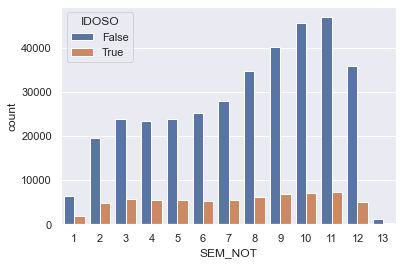

In [29]:
#Gráfico de casos de doenças respiratórias por semana de notificação
#todas as doenças
#todos os estados
#df['SEM_NOT'].value_counts(sort = False).plot.bar()
sns.countplot(data=df, x = 'SEM_NOT', hue = 'IDOSO')

In [30]:
# Casos diagnosticados como COVID 19 (=5)
# CLASS_FINAL
# 1-SRAG por i nfluenza
# 2-SRAG por outro vírus re s piratório
# 3-SRAGpor   outro   a gente e ti ológico, qual:
# 4-SRAG nã o e specificado
# 5-SRAG por COVI D-19 <-----
df['CLASSI_FIN'].value_counts()

5.0    264757
4.0     63757
2.0      2110
3.0       738
1.0       365
Name: CLASSI_FIN, dtype: int64

In [31]:
#Subset Covid
df_c19 = df[df['CLASSI_FIN']==5]

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

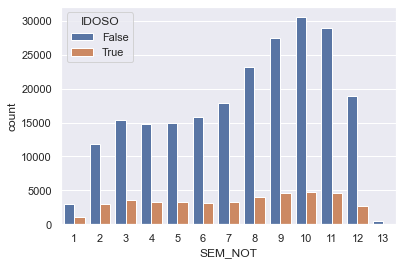

In [32]:
#Gráfico de casos de COVID 19 por semana de notificação
# É possível verificar o aumento no mês de março
#df_c19['SEM_NOT'].value_counts(sort = False).plot.bar()
#Apenas Covid19
#Todos os estados
sns.countplot(data=df_c19, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

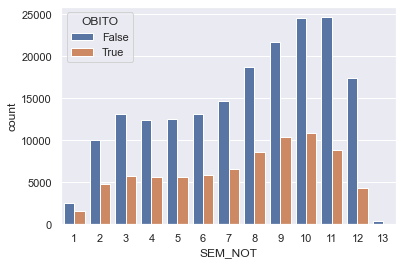

In [33]:
#Gráfico de casos de COVID 19 por semana de notificação
# É possível verificar o aumento no mês de março
#df_c19['SEM_NOT'].value_counts(sort = False).plot.bar()
#Apenas Covid19
#Todos os estados
sns.countplot(data=df_c19, x = 'SEM_NOT', hue = 'OBITO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

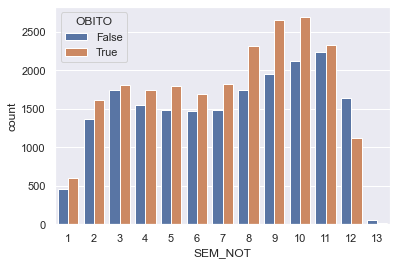

In [34]:
#Gráfico de casos de COVID 19 por semana de notificação
# É possível verificar o aumento no mês de março
#df_c19['SEM_NOT'].value_counts(sort = False).plot.bar()
#Apenas Covid19
#Apenas Idosos
#Todos os estados
sns.countplot(data=df_c19[df_c19['IDOSO']==True], x = 'SEM_NOT', hue = 'OBITO')

In [35]:
# Evolução dos casos de Covid 19
# 1 - Cura
# 2 - Óbito
# 3 - Óbito por outras causas
# 9 - Ignorado
#

df_c19['EVOLUCAO'].value_counts()

1.0    109123
2.0     79029
9.0      8132
3.0       459
Name: EVOLUCAO, dtype: int64

In [36]:
#Sub Dataframe apenas com óbitos por covid 19
df_ob = df_c19[df_c19['EVOLUCAO']==2]
df_ob.head(20)

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
5,11/01/2021,2,SP,GVE VIII MOGI DAS CRUZES,M,07/03/1948,72,2.0,5.0,2.0,False,True,True
14,05/01/2021,1,RJ,NaN,F,24/09/1969,51,NaN,5.0,2.0,False,True,True
25,11/01/2021,2,SP,GVE XVII CAMPINAS,F,20/01/1931,89,2.0,5.0,2.0,True,True,True
39,05/01/2021,1,SP,GVE I CAPITAL,M,19/01/1952,68,2.0,5.0,2.0,False,True,True
50,11/01/2021,2,SC,JOINVILLE,M,11/03/1932,88,NaN,5.0,2.0,True,True,True
57,08/01/2021,1,SP,GVE I CAPITAL,F,15/06/1954,66,NaN,5.0,2.0,False,True,True
64,05/01/2021,1,MG,UBERLANDIA,F,23/09/1971,49,2.0,5.0,2.0,False,True,True
68,09/01/2021,1,RS,006 CRS,M,21/07/1934,86,2.0,5.0,2.0,True,True,True
69,10/01/2021,2,SP,GVE I CAPITAL,F,26/07/1926,94,NaN,5.0,2.0,True,True,True
81,07/01/2021,1,SP,GVE XV BAURU,F,28/05/1952,68,NaN,5.0,2.0,False,True,True


<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

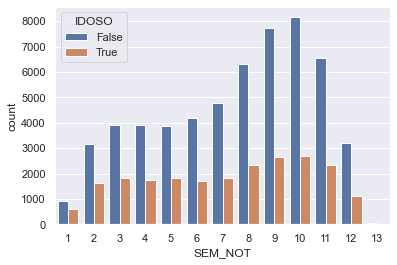

In [37]:
#Gráfico de casos de óbitos por COVID19 por semana de notificação
#df_ob['SEM_NOT'].value_counts(sort = False).plot.bar()
#Apenas Covid19
#Todos os estados
#Apenas os óbitos
sns.countplot(data=df_ob, x = 'SEM_NOT', hue = 'IDOSO')

In [38]:
#informações numéricas sobre óbitos por Covid-19
df_ob.describe()

,SEM_NOT,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO
count,79029.000000,79029.000000,38324.000000,79029.0,79029.0
mean,7.368384,67.368434,1.955772,5.0,2.0
std,3.050171,15.588855,1.179415,0.0,0.0
min,1.000000,0.000000,1.000000,5.0,2.0
25%,5.000000,58.000000,2.000000,5.0,2.0
50%,8.000000,69.000000,2.000000,5.0,2.0
75%,10.000000,79.000000,2.000000,5.0,2.0
max,13.000000,128.000000,9.000000,5.0,2.0


In [39]:
#informações numéricas sobre  óbitos de pessoas com mais de IDADE anos
df_ob[df_ob['NU_IDADE_N']>=idade].describe()


,SEM_NOT,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO
count,22229.000000,22229.000000,10970.000000,22229.0,22229.0
mean,7.056908,84.839174,2.086873,5.0,2.0
std,3.135855,5.259301,1.135388,0.0,0.0
min,1.000000,78.000000,1.000000,5.0,2.0
25%,4.000000,81.000000,2.000000,5.0,2.0
50%,8.000000,84.000000,2.000000,5.0,2.0
75%,10.000000,88.000000,2.000000,5.0,2.0
max,13.000000,128.000000,9.000000,5.0,2.0


In [40]:
#Sub set de maiores de óbitos por covid para maiores de 80 anos
df_idoso = df_ob[df_ob['NU_IDADE_N']>=idade]
df_idoso.tail()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
421238,21/03/2021,12,PE,001,M,10/08/1942,78,NaN,5.0,2.0,True,True,True
421245,09/03/2021,10,CE,22 CRES CASCAVEL,M,24/08/1927,93,2.0,5.0,2.0,True,True,True
421261,18/03/2021,11,RJ,NaN,F,06/11/1935,85,NaN,5.0,2.0,True,True,True
421275,14/03/2021,11,CE,10 CRES LIMOEIRO DO NORTE,F,21/12/1926,94,2.0,5.0,2.0,True,True,True
421341,20/03/2021,11,SP,GVE XVII CAMPINAS,F,23/05/1932,88,2.0,5.0,2.0,True,True,True


In [41]:
idade

78

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

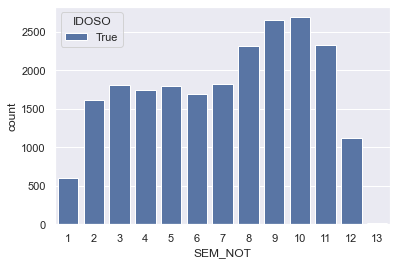

In [42]:
#Gráfico de casos de óbitos de idosos por COVID19 por semana de notificação
#df_idoso['SEM_NOT'].value_counts(sort = False).plot.bar()
sns.countplot(data=df_idoso, x = 'SEM_NOT', hue = 'IDOSO')

In [43]:
df_estado=df_idoso[df_idoso['SG_UF_NOT']== estado]

In [44]:
df_estado.head()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
25,11/01/2021,2,SP,GVE XVII CAMPINAS,F,20/01/1931,89,2.0,5.0,2.0,True,True,True
69,10/01/2021,2,SP,GVE I CAPITAL,F,26/07/1926,94,NaN,5.0,2.0,True,True,True
112,13/01/2021,2,SP,GVE I CAPITAL,M,25/10/1939,81,2.0,5.0,2.0,True,True,True
123,14/01/2021,2,SP,GVE I CAPITAL,M,11/11/1933,87,NaN,5.0,2.0,True,True,True
151,14/01/2021,2,SP,GVE XV BAURU,F,07/12/1930,90,2.0,5.0,2.0,True,True,True


In [45]:
df_estado.sample()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
322222,24/01/2021,4,SP,GVE IX FRANCO DA ROCHA,F,13/12/1942,78,NaN,5.0,2.0,True,True,True


In [46]:
df_estado.tail()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_REGIONA,CS_SEXO,DT_NASC,NU_IDADE_N,OBESIDADE,CLASSI_FIN,EVOLUCAO,IDOSO,OBITO,COVID19
420824,28/02/2021,9,SP,GVE XXXI SOROCABA,F,15/10/1933,87,NaN,5.0,2.0,True,True,True
420960,01/03/2021,9,SP,GVE I CAPITAL,F,22/10/1924,96,2.0,5.0,2.0,True,True,True
420982,08/03/2021,10,SP,GVE XII ARARAQUARA,M,10/10/1940,80,2.0,5.0,2.0,True,True,True
421168,18/03/2021,11,SP,GVE XX PIRACICABA,F,23/12/1934,86,NaN,5.0,2.0,True,True,True
421341,20/03/2021,11,SP,GVE XVII CAMPINAS,F,23/05/1932,88,2.0,5.0,2.0,True,True,True


In [47]:
#

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

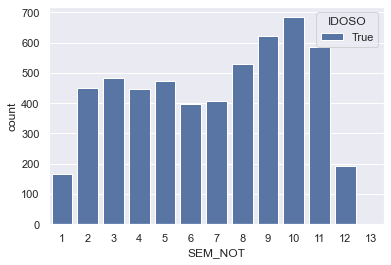

In [48]:
#Gráfico com Seaborn - Óbitos Covid19 em SP
sns.countplot(data=df_estado, x = 'SEM_NOT', hue = 'IDOSO')

<AxesSubplot:xlabel='SEM_NOT', ylabel='count'>

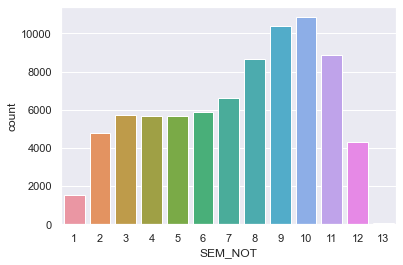

In [49]:
#Gráfico com Seaborn - Óbitos todas as idades em Brasil
sns.countplot(data=df_ob, x = 'SEM_NOT')